In [ ]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

path=logfile()
#%logstop
%logstart -otq $path append

# [python - cannot override sys.excepthook - Stack Overflow](https://stackoverflow.com/questions/1261668/cannot-override-sys-excepthook/28758396)
# https://github.com/ipython/ipython/blob/e6432249582e05f438303ce73d082a0351bb383e/IPython/core/interactiveshell.py#L1952

import sys
import traceback
import IPython

try:
    _showtraceback
except NameError:
    _showtraceback=IPython.core.interactiveshell.InteractiveShell.showtraceback

try:
    _showsyntaxerror
except NameError:
    _showsyntaxerror=IPython.core.interactiveshell.InteractiveShell.showsyntaxerror

import logging
logging.basicConfig(filename=path.replace('.log','-exc.log'), format='%(asctime)s %(message)s', level=logging.ERROR, force=True)

import sys
import traceback
import IPython

def showtraceback(self, *args, **kwargs):
    etype, value, tb = self._get_exc_info(kwargs.get('exc_tuple'))
    stb = self.InteractiveTB.structured_traceback(
        etype, value, tb, tb_offset=kwargs.get('tb_offset'))
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showtraceback(self, *args, **kwargs)

def showsyntaxerror(self, *args, **kwargs):
    etype, value, last_traceback = self._get_exc_info()
    elist = traceback.extract_tb(last_traceback) if kwargs.get('running_compiled_code') else []
    stb = self.SyntaxTB.structured_traceback(etype, value, elist)
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showsyntaxerror(self, *args, **kwargs)

IPython.core.interactiveshell.InteractiveShell.showtraceback = showtraceback
IPython.core.interactiveshell.InteractiveShell.showsyntaxerror = showsyntaxerror

# ケプラーの法則

* (1473 &ndash; 1543) [Nicolaus Copernicus - Wikipedia](https://en.wikipedia.org/wiki/Nicolaus_Copernicus) 
* (1546 &ndash; 1601) [Tycho Brahe - Wikipedia](https://en.wikipedia.org/wiki/Tycho_Brahe) 
* (1571 &ndash; 1630) [Johannes Kepler - Wikipedia](https://en.wikipedia.org/wiki/Johannes_Kepler) 

* [Kepler's laws of planetary motion - Wikipedia](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion#:~:text=The%20three%20laws%20state%20that,major%20axis%20of%20its%20orbit.)
  1. (1609) 惑星の軌道は、太陽を2つの焦点のうちの1つとする楕円である。
  2. (1609) 惑星と太陽を結ぶ線分は、等時間間隔で同じ面積を描いている。
  3. (1619) 惑星の公転周期の2乗は、公転軌道の半長軸の長さの3乗に比例する。

「Keplerは、円軌道を仮定したCopernicus的太陽系モデルを信じていたが、Braheの高精度な観測と火星の円軌道の適合がうまくいかず、火星は水星以外の惑星の中で最も離心率が高いことがわかった。」

* [Kepler's equation - Wikipedia](https://en.m.wikipedia.org/wiki/Kepler%27s_equation#See_also)
  - [Kepler's Equation -- from Wolfram MathWorld](https://mathworld.wolfram.com/KeplersEquation.html)

$$
  M = E - e \sin E
$$

* [Mean anomaly - Wikipedia](https://en.wikipedia.org/wiki/Mean_anomaly)
* [Eccentric anomaly - Wikipedia](https://en.wikipedia.org/wiki/Eccentric_anomaly)

* [Transcendental equation - Wikipedia](https://en.wikipedia.org/wiki/Transcendental_equation)

* [Eccentricity (mathematics) - Wikipedia](https://en.wikipedia.org/wiki/Eccentricity_%28mathematics%29)

$$
  \frac{x^2}{a^2} + \frac{y^2}{b^2} = 1
$$

$$
  \epsilon = \sqrt{1-\frac{b^2}{a^2}}
$$

* [Conic Section Directrix -- from Wolfram MathWorld](https://mathworld.wolfram.com/ConicSectionDirectrix.html)

In [1]:
from scipy.special import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import matplotlib.patches as mp

1 0.8 0.6


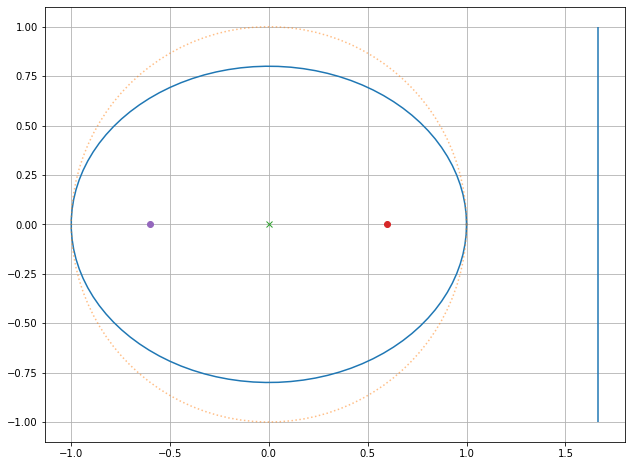

In [5]:
theta = np.linspace(0, 2*np.pi, 100)
epsilon = 0.6
#epsilon = 0.9673 # 1P/Halley
#epsilon = 0.0935 # mars
#epsilon = 0.0167 # earth
a=1
b= np.sqrt(a**2-epsilon**2)
print(a, b, a*epsilon)

ax = plt.figure(figsize=(16,8)).add_subplot()
ax.set_aspect('equal')

X0 = np.cos(theta)
Y0 = b * np.sin(theta)
ax.plot(X0,Y0)

X1 = np.cos(theta)
Y1 = np.sin(theta)
ax.plot(X1,Y1, ':', alpha=.5)

l = mc.LineCollection([[(a/epsilon,-1),(a/epsilon,1)]])
ax.add_collection(l)

ax.plot(0,0,'x')
ax.plot( a*epsilon, 0, 'o')
ax.plot(-a*epsilon, 0, 'o')

plt.grid()
plt.show()

## ニュートンによるケプラー方程式の証明

* [Philosophiæ Naturalis Principia Mathematica - Wikipedia](https://en.wikipedia.org/wiki/Philosophi%C3%A6_Naturalis_Principia_Mathematica)

$$
  M = E - e \sin E
$$

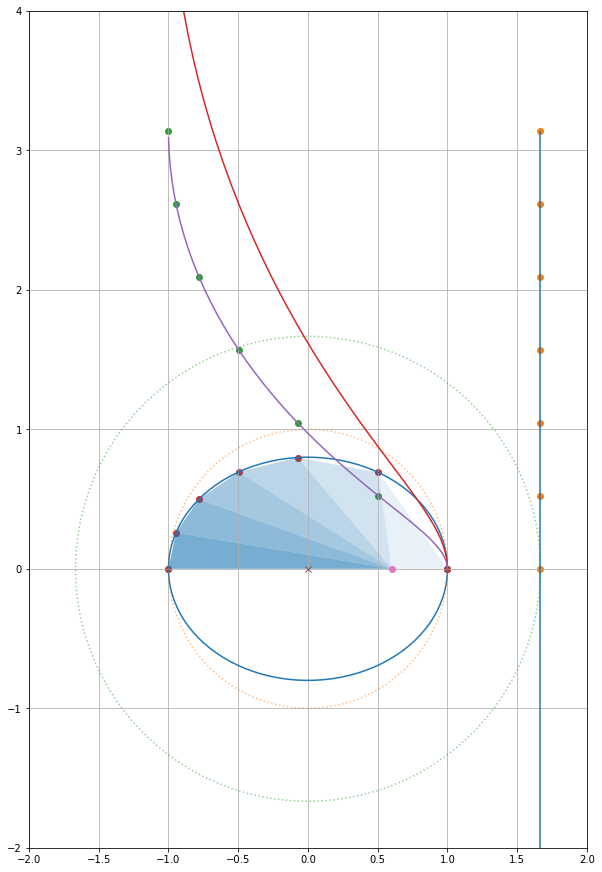

In [6]:
ax = plt.figure(figsize=(10,30)).add_subplot()
ax.set_xlim([-2,2])
ax.set_ylim([-2,4])
ax.set_aspect('equal')

X0 = np.cos(theta)
Y0 = b * np.sin(theta)
ax.plot(X0,Y0)

X1 = np.cos(theta)
Y1 = np.sin(theta)
ax.plot(X1,Y1, ':', alpha=.5)

X2 = (a/epsilon) * np.cos(theta)
Y2 = (a/epsilon) * np.sin(theta)
ax.plot(X2,Y2, ':', alpha=.5)

Y3 = a/epsilon*theta - a*np.sin(theta)
ax.plot(np.cos(theta[:50]), Y3[:50])
ax.plot(np.cos(theta[:50]), epsilon*Y3[:50])

l = mc.LineCollection([[(a/epsilon,-2),(a/epsilon,np.pi)]])
ax.add_collection(l)

ax.plot(0,0,'x')
ax.plot(epsilon,0,'o')
ax.scatter(*zip(*[(a,0),(-a,0)]), alpha=.5)

phi = np.linspace(0, np.pi, 7)
X4=[t + np.sum([2/n * jv(n, epsilon*n) * np.sin(n*t) for n in range(1,40)]) for t in phi]
ax.scatter(np.full_like(phi, a/epsilon), phi)
ax.scatter(a*np.cos(X4), phi)

ax.scatter(a*np.cos(X4), b*np.sin(X4))

XY = np.array((a*np.cos(X4), b*np.sin(X4))).T
for i in range(XY.shape[0]-1):
    p=np.concatenate((np.array([[epsilon,0]]), XY[i:i+2]),axis=0)
    ax.add_patch(mp.Polygon(p, alpha=(i+1)/10))

plt.grid()
plt.show()

[97.83899242 32.38159667 17.46700796 12.46664204 10.34259764  9.50316326]


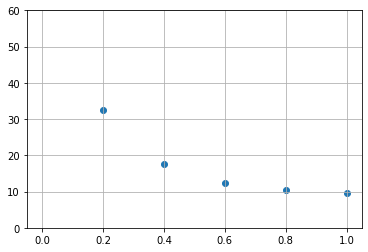

In [7]:
XY = np.array((a*np.cos(X4), b*np.sin(X4))).T
Y9=np.arctan2(*(XY-np.array((epsilon,0))).T[::-1])*180/np.pi
Y8=np.diff(Y9)
print(Y8)
plt.scatter(np.linspace(0,1,len(Y8)),Y8)
plt.ylim([0,60])
plt.grid()
plt.show()

### 火星の公転角速度の変化

[35.94653859 33.85827002 30.84781135 28.07926617 26.12558095 25.14253292]


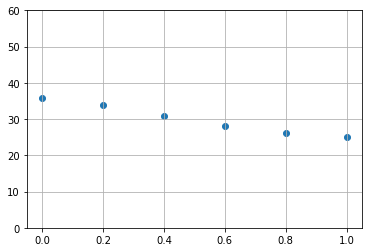

In [4]:
XY = np.array((a*np.cos(X4), b*np.sin(X4))).T
Y9=np.arctan2(*(XY-np.array((epsilon,0))).T[::-1])*180/np.pi
Y8=np.diff(Y9)
print(Y8)
plt.scatter(np.linspace(0,1,len(Y8)),Y8)
plt.ylim([0,60])
plt.grid()
plt.show()

### 地球の公転角速度の変化

[30.97439563 30.70013329 30.23879445 29.72662134 29.29985015 29.06020514]


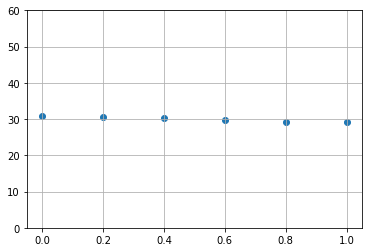

In [383]:
XY = np.array((a*np.cos(X4), b*np.sin(X4))).T
Y9=np.arctan2(*(XY-np.array((epsilon,0))).T[::-1])*180/np.pi
Y8=np.diff(Y9)
print(Y8)
plt.scatter(np.linspace(0,1,len(Y8)),Y8)
plt.ylim([0,60])
plt.grid()
plt.show()

* [楕円軌道とケプラー方程式(Kepler equation)](http://fnorio.com/0158Kepler_equation/Kepler_equation.html#3-2)

## ニュートンの運動方程式

* [地球の公転軌道が楕円であることの導出 | 高校数学の美しい物語](https://manabitimes.jp/math/1263)
* [単振動：運動方程式](https://w3e.kanazawa-it.ac.jp/math/physics/category/mechanics/masspoint_mechanics/simple_harmonic_motion/henkan-tex.cgi?target=/math/physics/category/mechanics/masspoint_mechanics/simple_harmonic_motion/shm_equation_of_motion.html)
* [単振動：微分方程式の解法](https://w3e.kanazawa-it.ac.jp/math/physics/category/mechanics/masspoint_mechanics/simple_harmonic_motion/henkan-tex.cgi?target=/math/physics/category/mechanics/masspoint_mechanics/simple_harmonic_motion/shm_solution.html)

## 参考) ケプラー方程式を解く

* [numpy - Find root of a transcendental equation with python - Stack Overflow](https://stackoverflow.com/questions/43047463/find-root-of-a-transcendental-equation-with-python)

In [38]:
from scipy.special import *

In [7]:
import numpy as np
from sympy import *

In [2]:
import matplotlib.pyplot as plt

In [61]:
t=np.pi/3
t + sum([2/n * jv(n, .6*n) * np.sin(n*t) for n in range(1,80)])

1.6455231032667712

In [62]:
X=np.linspace(0, 2*np.pi, 100)
Y=[t + sum([2/n * jv(n, .9*n) * np.sin(n*t) for n in range(1,40)]) for t in X]

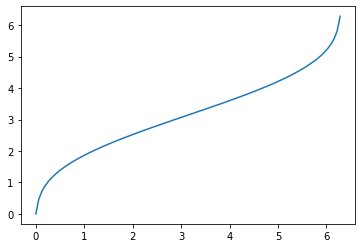

In [63]:
plt.plot(X,Y)

In [64]:
from scipy.optimize import fsolve

In [68]:
fsolve(lambda x: x - .9 * sin[x] - np.pi/3, [-2*np.pi, 2*np.pi])

TypeError: 'FunctionClass' object is not subscriptable